In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import optim

# Dataset

In [3]:
from library.dataset import get_pytorch_datataset, BATCH_SIZE

df_returns_real, dataset, dataloader, N_ASSETS, WINDOW_SIZE = get_pytorch_datataset()

print(f'\nDataset length: {len(dataset)}')
print(f'Number of assets: {N_ASSETS}')
sample_batch = next(iter(dataloader))
assert sample_batch.size() == (BATCH_SIZE, N_ASSETS, WINDOW_SIZE)
print(f'Sample batch: {sample_batch.size()}')

Chosen tickers: ['LKOH', 'SBERP', 'VTBR', 'SBER', 'MOEX']
Length before dropping NaNs: 2603
Length after dropping NaNs: 2577

Dataset length: 2325
Number of assets: 5
Sample batch: torch.Size([256, 5, 252])


# GAN


In [4]:
from library.constants import DEVICE

print(f'Use device: {DEVICE}')

Use device: cuda:0


In [5]:
from library.gan import Discriminator, Generator

assert Discriminator()(next(iter(dataloader))).size() == (BATCH_SIZE,)
assert Generator()(Generator.get_noise(BATCH_SIZE)).size() == next(iter(dataloader)).size()

## Train

50 train time: 27.6s. Estimated train time: 299.0m
Fake std: [0.00530257 0.00530721 0.00390586 0.00421902 0.00236066].
Real std: [0.01934618 0.02170969 0.02256658 0.02320357 0.01871406]
Fake correlation: 0.7819163206434702. Real correlation: 0.9185647795211369


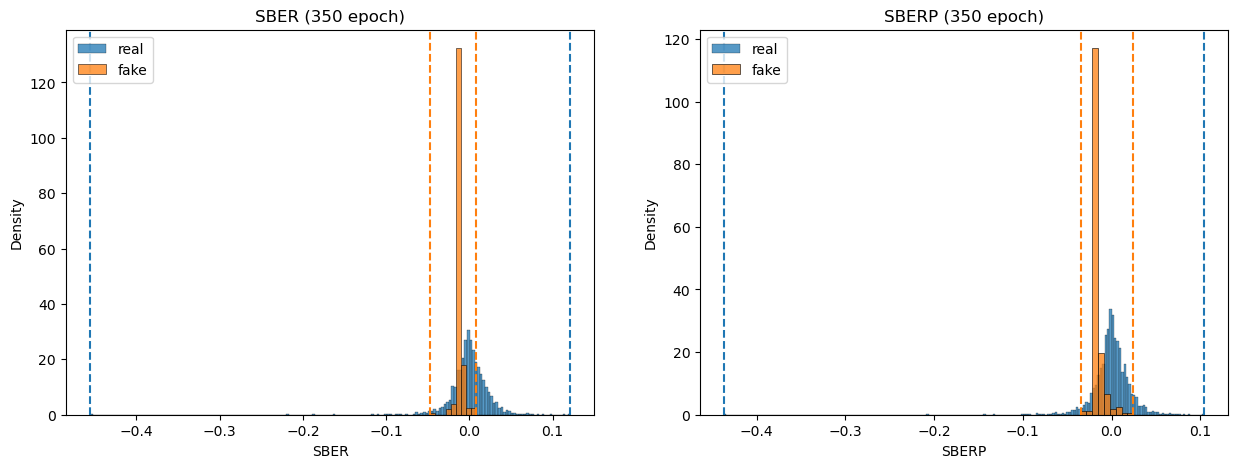

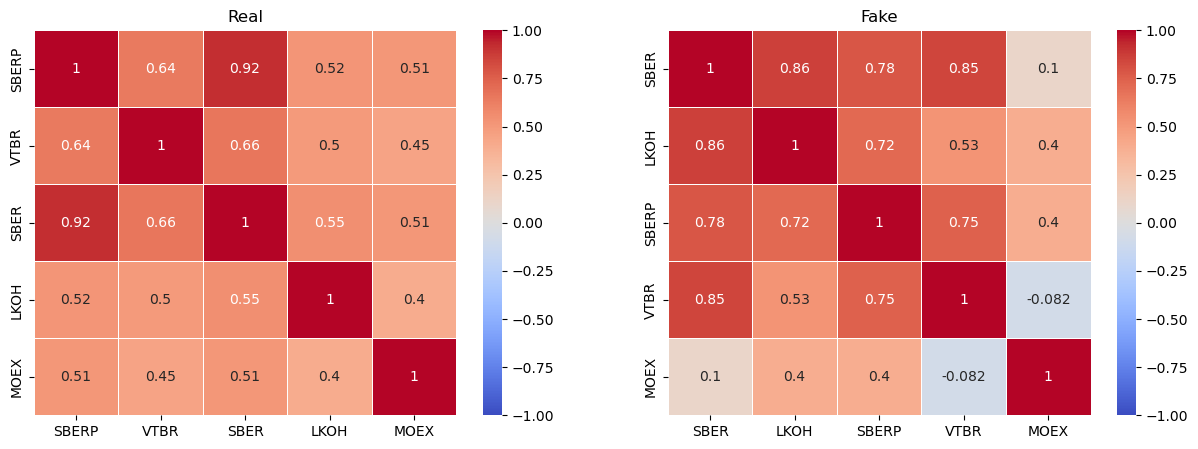

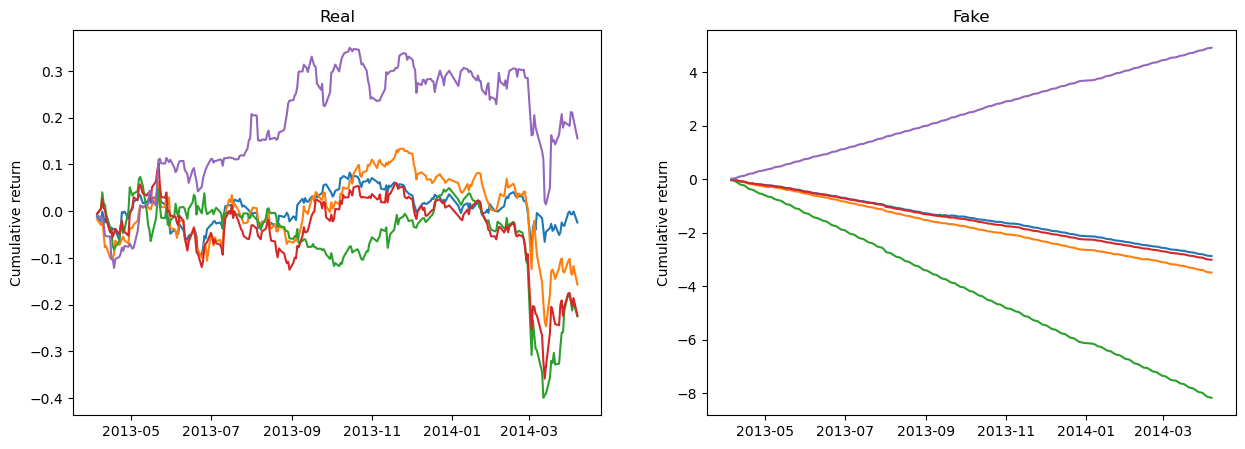

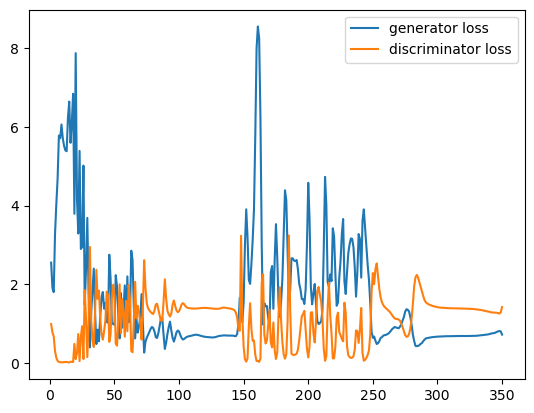

In [6]:
from library.gan_train_loop import train_gan

N_EPOCHS = 1000
LOG_FREQUENCY = 50
SAVE_FREQUENCY = 200

# Define generator and discriminator
discriminator = Discriminator().to(DEVICE)
generator = Generator().to(DEVICE)

# Define the optimizers for generator and discriminator
LR = 0.001
generator_optimizer = optim.Adam(generator.parameters(), lr=LR)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=LR)

# Train GAN
discriminator_losses, generator_losses = train_gan(generator, discriminator, generator_optimizer, discriminator_optimizer, dataloader, df_returns_real, n_epochs=N_EPOCHS, log_frequency=LOG_FREQUENCY, save_frequency=SAVE_FREQUENCY, model_prefix='TCN')